[(312.2413701769427, 14.128404984709686), (188.18728915124822, 462.5230405374376)]


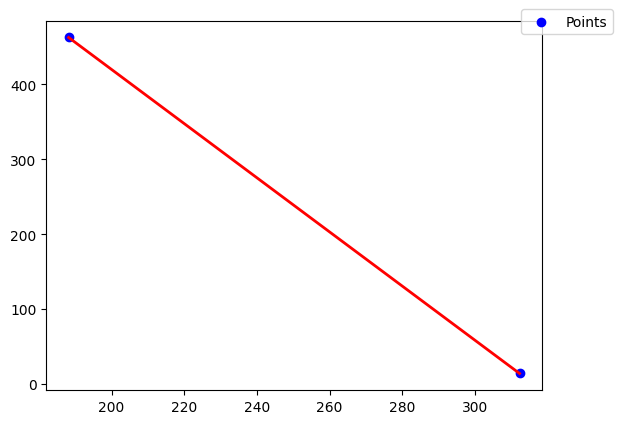

In [2]:
from quickhull_folder.quickhull import *

import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import random


## Create a list to store the convex hull points
CONVEX_HULL_POINTS = []
POINTS = [] # Initialize an empty list to store points


def add_point():

    point_str = point_entry.get()
    
    try:
        
        x, y = map(float, point_str.split(","))
        POINTS.append((x, y))
        update_plot()
        display_point_count()
        point_entry.delete(0, tk.END)  # Clear the input field after adding a point

    except ValueError:
        pass  # Handle invalid input

def add_random_points():

    num_points_str = num_points_entry.get()
    
    try:
        num_points = int(num_points_str)
        if num_points < 1:
            return
        for _ in range(num_points):
            x = random.uniform(0.0, 500.0)  # Adjust the range as needed
            y = random.uniform(0.0, 500.0)  # Adjust the range as needed
            POINTS.append((x, y))
        update_plot()
        display_point_count()
    
    except ValueError:
        pass

def add_point_on_enter(event):

    add_point()

def add_random_points_on_enter(event):

    add_random_points()    


def clear_points():

    global POINTS
    
    POINTS = []
    update_plot()
    display_point_count()


def update_plot():

    ax.clear()

    if POINTS:
        
        x, y = zip(*POINTS)
        ax.scatter(x, y, c='b', marker='o', label='Points')

    # Place the legend outside and under the plot
    ax.legend(loc='upper center', bbox_to_anchor = (1.05, 1.05))

    canvas.draw()

# Function that does nothing when the button is clicked
def do_nothing():
    pass

# Create a function to display the current number of points
def display_point_count():
    point_count_label.config(text=f"Number of Points: {len(POINTS)}")

# QUICKHULL ALGORITHM
def quickhull_run(fig, ax, canvas, root, POINTS):

    convex_hull = quickhull(fig, ax, canvas, root, POINTS)

    print(convex_hull)

# DIVIDE AND CONQUER ALGORITHM
def divide_and_conquer_run():

    do_nothing()
    

def center_window(root):
    
    window_width = int(root.winfo_screenwidth() * 0.5) 
    window_height = int(root.winfo_screenwidth() * 0.5)

    screen_width = root.winfo_screenwidth()
    screen_height = root.winfo_screenheight()

    x = ( screen_width / 2 ) - ( window_width / 2 )
    y = ( screen_height / 2 ) - ( window_height / 2 )

    root.geometry(f'{window_width}x{window_height}+{int(x)}+{int(y)}')

#####################################################################################################################
#####################################################################################################################


# User Interface

# Create the main Tkinter window
root = tk.Tk()
root.title("Convex Hull Visualization")

center_window(root)  # Center the main window


# Create a Matplotlib plot in the Tkinter window
fig, ax = plt.subplots()
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().grid(row=5, column=0, columnspan=4, padx=5, pady=5)

# Create GUI elements
point_label = tk.Label(root, text="Enter Points (x.0, y.0):")
point_label.grid(row=0, column=0, padx=5, pady=5)

point_entry = tk.Entry(root)
point_entry.grid(row=1, column=0, padx=5, pady=5)
point_entry.bind("<Return>", add_point_on_enter)  # Bind the Enter key to add_point


tk.Button(root, text="Add Point", command=add_point).grid(row=2, column=0, padx=5, pady=5)
tk.Button(root, text="Clear Points", command=clear_points).grid(row=3, column=0, padx=5, pady=5)  # Button to clear points

# Input field for specifying the number of random points
num_points_label = tk.Label(root, text="Enter the number of random points:")
num_points_label.grid(row=0, column=1, padx=5, pady=5)

num_points_entry = tk.Entry(root)
num_points_entry.grid(row=1, column=1, padx=5, pady=5)
num_points_entry.bind("<Return>", add_random_points_on_enter)  # Bind the Enter key to add_point


tk.Button(root, text="Add Random Points", command=add_random_points).grid(row=2, column=1, padx=5, pady=5)
tk.Button(root, text="Clear Points", command=clear_points).grid(row=3, column=1, padx=5, pady=5)  # Button to clear points

tk.Button(root, text="Quickhull", command=lambda:quickhull_run(fig, ax, canvas, root, POINTS)).grid(row=1, column=2, rowspan=2, padx=5, pady=5)
tk.Button(root, text="Divide and Conquer", command=do_nothing).grid(row=2, column=2, rowspan=2, padx=5, pady=5)


# Create a label to display the point count
point_count_label = tk.Label(root, text="Number of Points: 0")
point_count_label.grid(row=4, column=0, columnspan=4, padx=10, pady=10)

root.mainloop()
